In [44]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# loading the dataset
df = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/dataset/Daily_Demand_Forecasting_Orders.csv", delimiter = ';'))
df

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [47]:
# display data information
df.info()

# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64  
 1   Day of the week (Monday to Friday)                                  60 non-null     int64  
 2   Non-urgent order                                                    60 non-null     float64
 3   Urgent order                                                        60 non-null     float64
 4   Order type A                                                        60 non-null     float64
 5   Order type B                                                        60 non-null     float64
 6   Order type C                                                        60 non-null     float64
 7   Fiscal sector order

In [48]:
# checking duplicates
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [49]:
# preventing data leakage
# spliting the dataset
X = df.drop(columns=['Target (Total orders)'])
y = df['Target (Total orders)']

print(X.shape)
print(y.shape)

(60, 12)
(60,)


In [50]:
# spliting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# handling multicollinearity
# VIF
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif)

                                              Feature         VIF
0   Week of the month (first week, second, third, ...    1.852607
1                  Day of the week (Monday to Friday)    2.593939
2                                    Non-urgent order  105.259585
3                                        Urgent order   12.469641
4                                        Order type A    5.962945
5                                        Order type B   22.110178
6                                        Order type C   25.080531
7                                Fiscal sector orders    1.758308
8           Orders from the traffic controller sector    4.301561
9                                  Banking orders (1)   13.867325
10                                 Banking orders (2)   14.027227
11                                 Banking orders (3)    1.798502


In [52]:
#selecting features
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['Non-urgent order', 'Urgent order', 'Order type B', 'Order type C',
       'Banking orders (2)'],
      dtype='object')


Text(0, 0.5, 'pred values')

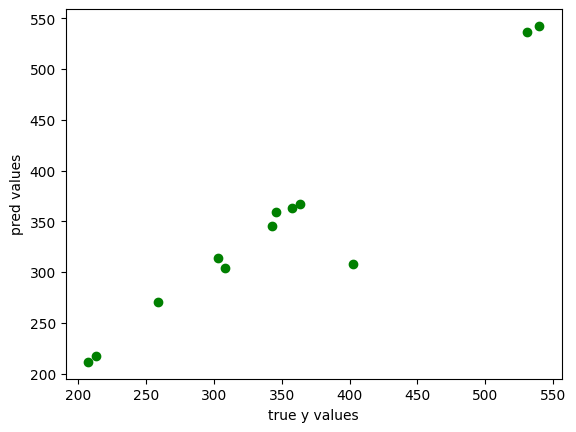

In [53]:
# model building
model = LinearRegression()
model.fit(X_train_selected, y_train)

# evaluation
X_test_selected = selector.transform(X_test)

# prediction
y_pred = model.predict(X_test_selected)

plt.scatter(y_test, y_pred, c='green')
plt.xlabel('true y values')
plt.ylabel('pred values')

In [54]:
# calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 785.1027483820303
Root Mean Squared Error: 28.019685015753307
R-squared: 0.9232952982998093
